# DBSCAN Clustering sample (Non Hierarchical Clustering)

- Group the points of contact in the same group.
- Determine points in low-density areas as noise.
- __No need to specify number of clusters__.
- The calculation is performed on all data, which is computationally expensive.

In [1]:
from typing import Any

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


def process_and_fit(x_input) -> Any:
    sc = preprocessing.StandardScaler()
    return sc.fit_transform(x_input)


def return_x_y(normalized) -> tuple[Any, Any]:
    return normalized[:, 0], normalized[:, 1]


def plot_figure() -> None:
    plt.figure(figsize=(8, 3))


def plot_scatter(x_input, y_input, title: str) -> None:
    plot_figure()

    plt.scatter(x_input, y_input)
    plt.suptitle(title)
    plt.show()


def plot_scatter_and_labels(x_input, y_input, labels, title: str) -> None:
    plot_figure()

    plt.scatter(x_input, y_input, c=labels)
    plt.suptitle(title)
    plt.show()


def plot_scatter_and_centers(x_input, y_input, z_km, title: str) -> None:
    plt.figure(figsize=(8, 3))
    plt.scatter(x_input, y_input, c=z_km.labels_)
    plt.scatter(
        z_km.cluster_centers_[:, 0],
        z_km.cluster_centers_[:, 1],
        s=250,
        marker='*',
        c='red'
    )
    plt.suptitle(title)
    plt.show()

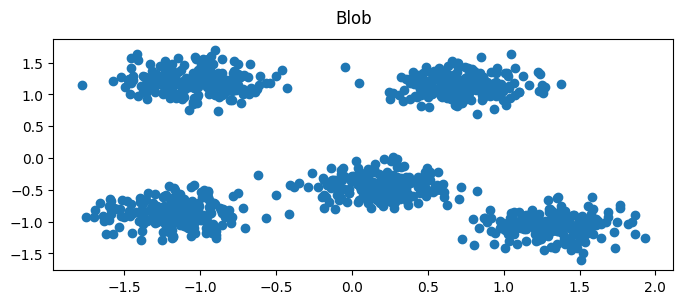

In [2]:
# Prepare dataset: Blobs
X_blob, _ = make_blobs(
    n_samples=1000,
    centers=5,
    cluster_std=1.2,
    random_state=10
)

X_blob_norm = process_and_fit(X_blob)
x_blob, y_blob = return_x_y(X_blob_norm)

plot_scatter(
    x_blob,
    y_blob,
    'Blob'
)

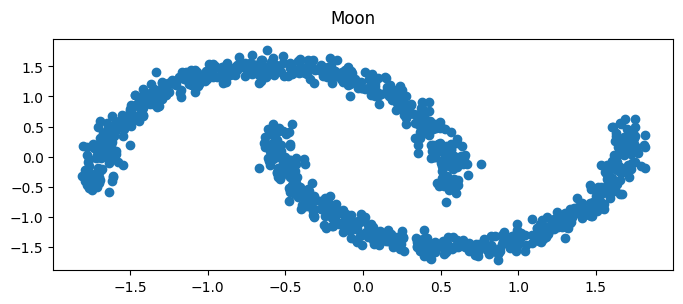

In [3]:
# Prepare dataset: Moons
X_moon, _ = make_moons(
    n_samples=1000,
    noise=0.05,
    random_state=0
)

X_moon_norm = process_and_fit(X_moon)
x_moon, y_moon = return_x_y(X_moon_norm)

plot_scatter(
    x_moon,
    y_moon,
    'Moon'
)

In [4]:
def k_means_clustering(clusters: int, norm):
    """K-Means Clustering
    """
    km = KMeans(
        n_init=10,
        n_clusters=clusters,
    )
    return km.fit(norm)


def dbscan_clustering(norm):
    """DBSCAN Clustering
    - If more points than the value of the min_points parameter are gathered
      within the radius determined by the eps parameter, it is considered to be a core point.
    - Even if the data is not a core point, if it is within the eps radius of a nearby core point,
      it is considered a reachable point.
    - Those that do not match them are classified as noise points and can be separated.
    """
    dbscan = DBSCAN(
        eps=0.2,
        min_samples=5,
        metric='euclidean'
    )
    return dbscan.fit_predict(norm)

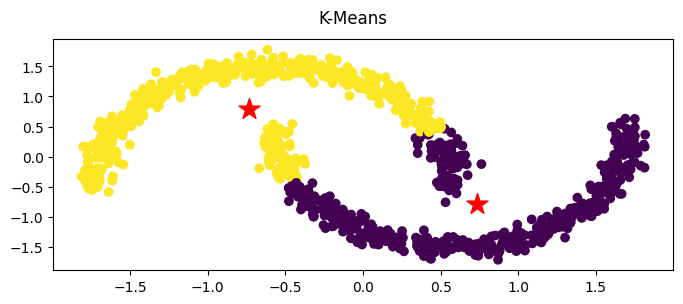

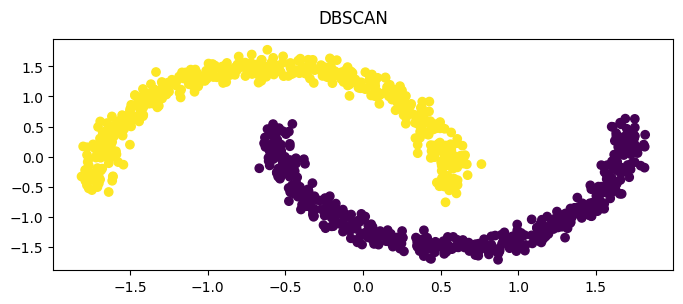

In [5]:
# K-Means Clustering (moon dataset)
z_km_moon = k_means_clustering(2, X_moon_norm)
plot_scatter_and_centers(
    x_moon,
    y_moon,
    z_km_moon,
    'K-Means'
)

# DBSCAN Clustering (moon dataset)
dbscan_moon = dbscan_clustering(X_moon_norm)
plot_scatter_and_labels(
    x_moon,
    y_moon,
    dbscan_moon,
    'DBSCAN'
)

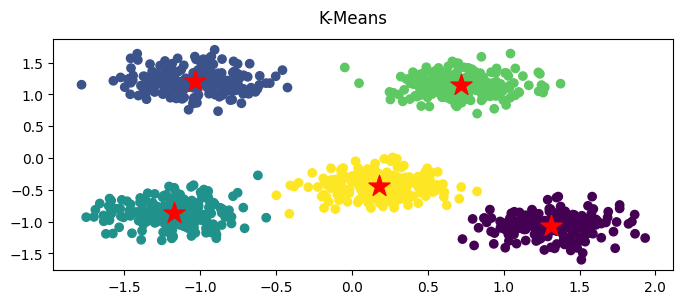

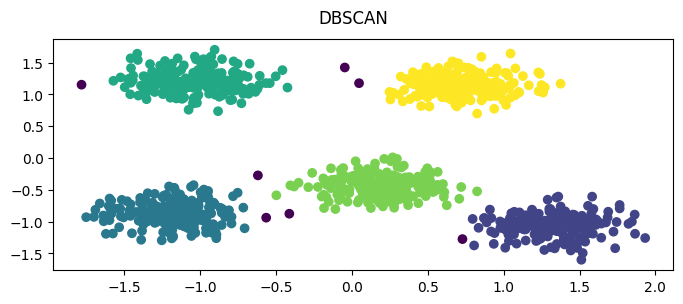

In [6]:
# K-Means Clustering (blob dataset)
z_km_norm = k_means_clustering(5, X_blob_norm)
plot_scatter_and_centers(
    x_blob,
    y_blob,
    z_km_norm,
    'K-Means'
)

# DBSCAN Clustering (blob dataset)
dbscan_norm = dbscan_clustering(X_blob_norm)
plot_scatter_and_labels(
    x_blob,
    y_blob,
    dbscan_norm,
    'DBSCAN'
)

In [7]:
# Confirm separated noise data
# (column 1 is cluster index, 2 is clusters number)
pd.DataFrame(dbscan_norm)[0].value_counts().sort_index()

-1      7
 0    199
 1    199
 2    199
 3    198
 4    198
Name: 0, dtype: int64

In [8]:
df_dbscan_blob = pd.DataFrame(X_blob)

df_dbscan_blob['cluster'] = dbscan_norm
df_dbscan_blob.columns = [
    'axis_0',
    'axis_1',
    'cluster'
]
df_dbscan_blob.head()

,axis_0,axis_1,cluster
0,4.196709,-9.392482,0
1,-6.724842,-8.473636,1
2,-6.296237,4.976868,2
3,7.808876,-7.848362,0
4,-4.599302,5.785041,2


<AxesSubplot: xlabel='axis_0', ylabel='axis_1'>

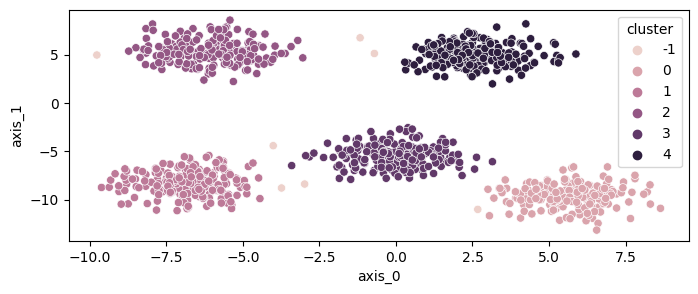

In [9]:
plot_figure()
sns.scatterplot(
    x='axis_0',
    y='axis_1',
    hue='cluster',
    data=df_dbscan_blob
)